In [1]:
!pip install sqlalchemy
!pip install pymysql
!pip install pandas
!pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import sqlalchemy, pymysql
from sqlalchemy import create_engine
import plotly.express as px

import matplotlib.pyplot as plt 
import seaborn as sns

# EXPLORE DATA

In [3]:
df = pd.read_csv('Customer-Churn-Records.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [54]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


df: 1000
| Tên Cột | Kiểu dữ liệu | Ý Nghĩa | Nhận xét tổng quan |
| :---    |  :----:      |  :---   |     :---           |
| CreditScore | int64  | Điểm tín dụng của khách hàng | Dao động trong khoảng từ 350 đến 850 |
| Age   | int64 | Số tuổi của khách hàng | Độ tuổi dao động từ 18 đến 92 tuổi, tuổi trung bình là 38.9 tuổi, trong đó 75% số người trong dữ liệu là dưới 44 tuổi |
| Tenure   | int64 | Số năm sử dụng dịch vụ của khách hàng | Số năm trở thành khách hàng trong bảng dữ liệu. Trung bình khách hàng gắn bó sử dụng là 5 năm, trong đó có 75% tỉ lệ khách hàng sử dụng trên 7 năm |
| Balance | float64 | Số dư tài khoản | Trung bình số dư tài khoản là hơn 76000, nhưng trong đó có dưới 25% số khách hàng có số dư tài khoản là 0|
| NumOfProducts | int64 | Số sản phẩm mà khách hàng đã sử dụng | Dao động từ 1-4 sản phẩm |
| HasCrCard | int64 | Khách hàng có hay không có thẻ tín dụng | Có 25% số khách hàng không sử dụng thẻ tín dụng |
| IsActiveMember | int64 | Chỉ số thể hiện khách hàng có tích cực sự dụng dịch vụ hay không | Có 25% số khách hàng không hoạt động thường xuyên|
| EstimatedSalary | float64 | Thu nhập ước tính của khách hàng | Thu nhập ước tính khá cao, trung bình khoảng 100.000 nhưng có thể thấy mức thấp nhật khá thấp chỉ có 11 |
| Exited | int64 | Khách hãng đã rời bỏ sử dụng dịch vụ hay chưa | Tỷ lệ khách hàng rời bỏ chiếm 20.4% |
| Complain | int64 | Số lần khách hàng khiếu nại trong quá trình sử dụng | Tỷ lệ khiếu nại của khách hàng là 20.4% trên tổng số |
| SatisfactionScore | int64 | Điểm hài lòng của khách hàng trong quá trinhg sử dụng | Thang điểm từ 1-5, trong đó có 50% tỷ lệ đánh giá trên 3 |
| CardType | float64 | Hạng thẻ của khách hàng | Có 4 hàng thẻ PLATINUM, DIAMOND, GOLD, GOLD |
| PointEarned | int64 | Điểm tích luỹ trong quan trinh sử dụng | Dao động từ 225 đến 1000 điểm, điểm trung bình 600đ |

In [103]:
pie_1 = df.groupby(['Exited'])[['Exited']].count()
px.pie(values = pie_1.Exited, names = pie_1.index)

In [105]:
pie_2 = df.groupby(['Complain'])[['Complain']].count()
px.pie(values = pie_2.Complain, names = pie_2.index)

In [57]:
df.drop(columns = ['CustomerId','Surname','RowNumber'], inplace = True)

In [93]:
for col in df.columns:
    print(col, ':',len(df[col].value_counts()))

RowNumber : 10000
CustomerId : 10000
Surname : 2932
CreditScore : 460
Geography : 3
Gender : 2
Age : 70
Tenure : 11
Balance : 6382
NumOfProducts : 4
HasCrCard : 2
IsActiveMember : 2
EstimatedSalary : 9999
Exited : 2
Complain : 2
Satisfaction Score : 5
Card Type : 4
Point Earned : 785


# EXPLORE VARIABLES

## TABLE OF CONTENT

### <b> <a href='#chapter1'>1. Age</a> 
### <b> <a href='#chapter2'>2. Tenure</a> 
### <b> <a href='#chapter3'>3. EstimatedSalary</a> 
### <b> <a href='#chapter4'>4. Geography</a> 
### <b> <a href='#chapter5'>5. Balance</a> 
### <b> <a href='#chapter6'>6. HasCrCard</a> 
### <b> <a href='#chapter7'>7. CreditScore</a> 
### <b> <a href='#chapter8'>8. IsActiveMember</a> 
### <b> <a href='#chapter9'>9. NumOfProducts</a> 
### <b> <a href='#chapter10'>10. Geography and Gender</a> 
### <b> <a href='#chapter11'>11. Tenure and Gender</a> 
### <b> <a href='#chapter12'>12. Number of products and Geography</a> 
### <b> <a href='#chapter13'>13. Conclude</a> 

##  <h2> <b>  1. Age: <a class='anchor' id='chapter1'></a>

In [116]:
Age_df = pd.pivot_table(df,values = 'Exited', index = 'Age', aggfunc = 'mean')
Age_df.reset_index(drop = False, inplace = True)
Age_df

,Age,Exited
0,18,0.090909
1,19,0.037037
2,20,0.050000
3,21,0.056604
4,22,0.142857
...,...,...
65,83,0.000000
66,84,0.500000
67,85,0.000000
68,88,0.000000


<Axes: xlabel='Age', ylabel='count'>

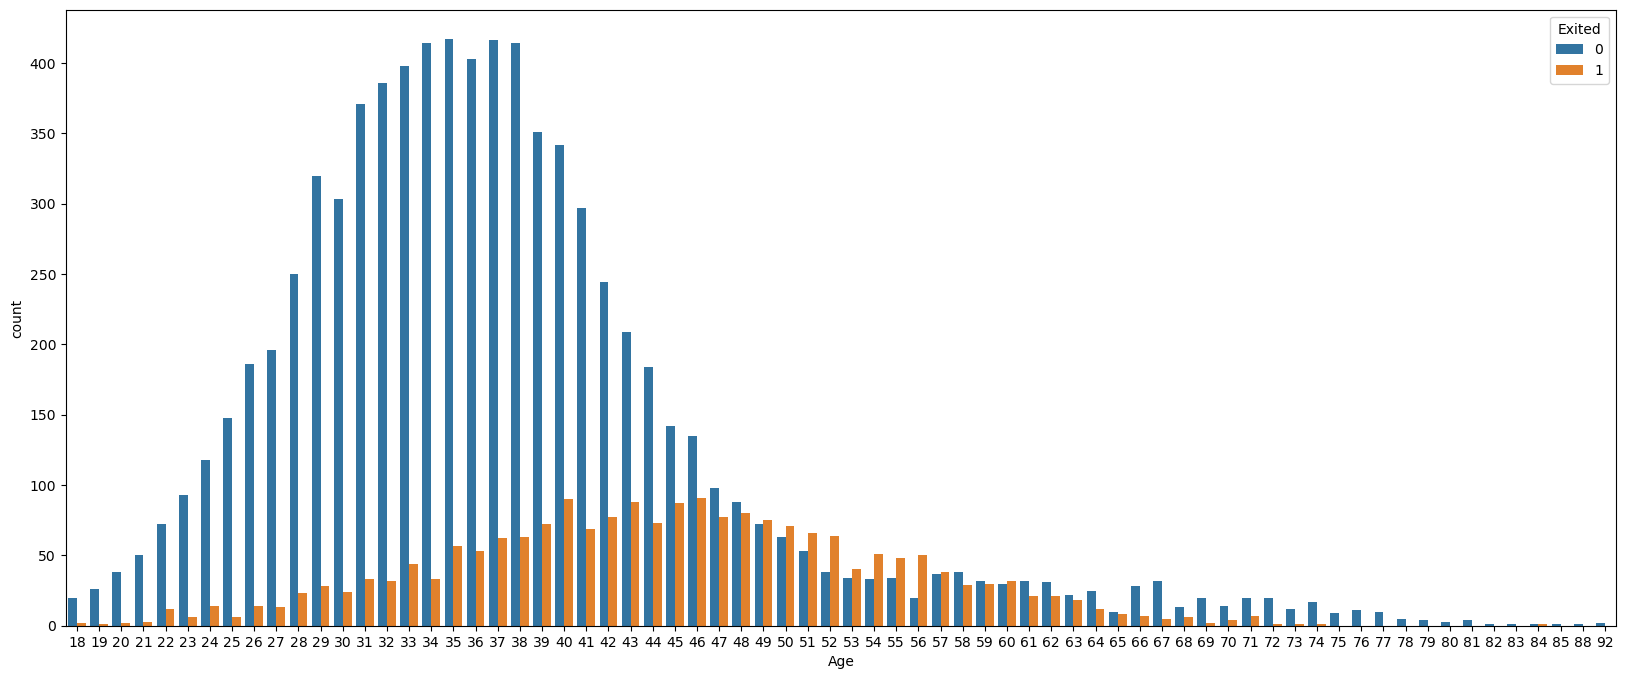

In [126]:
fig, ax = plt.subplots(figsize =(20, 8))
sns.countplot(data=df,x='Age',hue='Exited')

- Tỉ lệ người rời bỏ cao nhất rơi vào tuổi 46, khoảng có tỉ lệ rời bỏ cao nhất từ 40-50 tuổi
- Ở tuổi 84 có sự rời bỏ tăng vọt, vì số người tham gia và rời bỏ bằng nhau


##  <h2> <b>  2. Tenure: <a class='anchor' id='chapter2'></a>

In [111]:
Tenure_df = pd.pivot_table(df,values = 'Exited', index = 'Tenure', aggfunc = 'mean')
Tenure_df.reset_index(drop = False, inplace = True)
Tenure_df

,Tenure,Exited
0,0,0.230024
1,1,0.224155
2,2,0.191794
3,3,0.211100
4,4,0.205258
5,5,0.206522
6,6,0.202689
7,7,0.172179
8,8,0.192195
9,9,0.217480


<Axes: xlabel='Tenure', ylabel='count'>

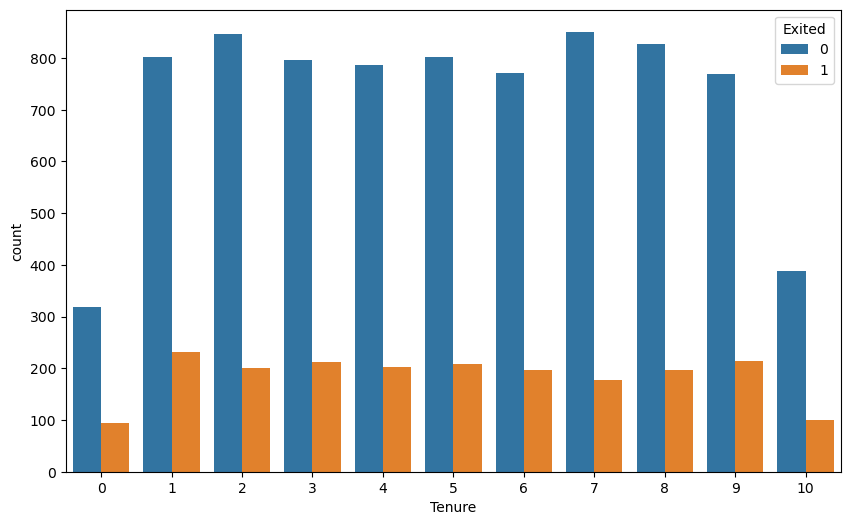

In [129]:
fig, ax = plt.subplots(figsize =(10, 6))
sns.countplot(data=df,x='Tenure',hue='Exited')

- Tỉ lệ rời bỏ qua từng năm sử dụng dịch vụ của khách hàng về cơ bản là không đổi, ~ 20%

##  <h2> <b>  3. EstimatedSalary: <a class='anchor' id='chapter3'></a>

In [5]:
EstSalary_df_fe = df[df['Gender']=='Female'][['Exited','EstimatedSalary']]
EstSalary_df_ma = df[df['Gender']=='Male'][['Exited','EstimatedSalary']]

EstSalary_df_fe.groupby(by='Exited').agg('mean')

,EstimatedSalary
Exited,
0,99816.071486
1,102948.986093


In [134]:
EstSalary_df_ma.groupby(by='Exited').agg('mean')

,EstimatedSalary
Exited,
0,99660.223205
1,99686.650656


- Mức lương trung bình không ảnh hưởng đến tỷ lệ rời bỏ của khách hàng

In [20]:
EstSalary_df = df.groupby(by=['EstimatedSalary','Exited']).agg('count')
EstSalary_df.reset_index(drop = False, inplace = True)
EstSalary_df = EstSalary_df[['EstimatedSalary','Exited']]
EstSalary_df

,EstimatedSalary,Exited
0,11.58,1
1,90.07,0
2,91.75,1
3,96.27,0
4,106.67,0
...,...,...
9994,199909.32,0
9995,199929.17,0
9996,199953.33,0
9997,199970.74,0


<Axes: xlabel='EstimatedSalary', ylabel='Count'>

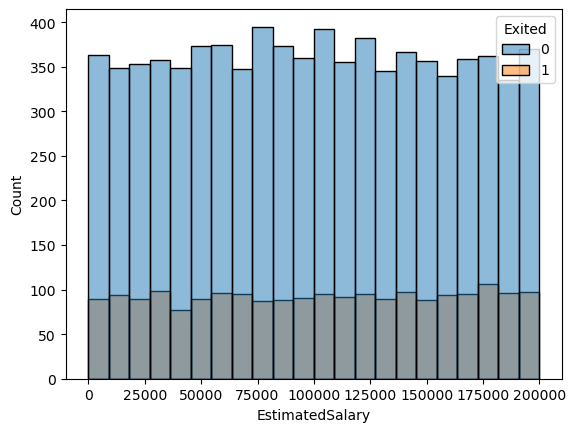

In [53]:
sns.histplot(data=EstSalary_df, x="EstimatedSalary", hue="Exited")

##  <h2> <b>  4. Geography: <a class='anchor' id='chapter4'></a>

In [79]:
Geo_df = df.groupby(by='Geography').agg('count')
Geo_df.reset_index(drop = False, inplace = True)
Geo_df = Geo_df[['Geography','Age']]
Geo_df.rename(inplace=True,columns={'Age':'Count'})
Geo_df

,Geography,Count
0,France,5014
1,Germany,2509
2,Spain,2477


In [82]:
Geography_df = pd.pivot_table(df,values = 'Exited', index = 'Geography', aggfunc = 'mean')
Geography_df.reset_index(drop = False, inplace = True)
Geography_df

Geography_df = Geo_df.merge(Geography_df,on="Geography",how="inner")
Geography_df

,Geography,Count,Exited
0,France,5014,0.161747
1,Germany,2509,0.324432
2,Spain,2477,0.166734


In [85]:
France_df = df[df['Geography']=='France']
France_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000
mean,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161747,0.161947,3.017750,607.169924
std,97.016799,10.469459,2.888475,64133.565524,0.570347,0.455356,0.499769,57336.289016,0.368255,0.368439,1.402843,225.611730
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000,0.000000,1.000000,119.000000
25%,582.000000,31.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51399.190000,0.000000,0.000000,2.000000,412.000000
50%,653.000000,37.000000,5.000000,62153.500000,1.000000,1.000000,1.000000,99132.310000,0.000000,0.000000,3.000000,604.000000
75%,717.000000,43.000000,7.000000,121444.877500,2.000000,1.000000,1.000000,149295.360000,0.000000,0.000000,4.000000,802.000000
max,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199929.170000,1.000000,1.000000,5.000000,1000.000000


In [86]:
Germany_df = df[df['Geography']=='Germany']
Germany_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.00000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000
mean,651.453567,39.771622,5.009964,119730.116134,1.519729,0.71383,0.497409,101113.435102,0.324432,0.326425,3.005978,610.215225
std,98.168937,10.519143,2.935154,27022.006157,0.619420,0.45206,0.500093,58263.011501,0.468256,0.468998,1.410107,225.147896
min,350.000000,18.000000,0.000000,27288.430000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,163.000000
25%,584.000000,32.000000,2.000000,102800.720000,1.000000,0.00000,0.000000,51016.020000,0.000000,0.000000,2.000000,412.000000
50%,651.000000,38.000000,5.000000,119703.100000,1.000000,1.00000,0.000000,102397.220000,0.000000,0.000000,3.000000,615.000000
75%,722.000000,45.000000,8.000000,137560.380000,2.000000,1.00000,1.000000,151083.800000,1.000000,1.000000,4.000000,802.000000
max,850.000000,84.000000,10.000000,214346.960000,4.000000,1.00000,1.000000,199970.740000,1.000000,1.000000,5.000000,1000.000000


In [87]:
Spain_df = df[df['Geography']=='Spain']
Spain_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000
mean,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734,0.166734,3.013726,601.441663
std,94.365051,10.446119,2.856660,64235.555208,0.564646,0.460588,0.499220,57103.678091,0.372813,0.372813,1.408423,227.341158
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,417.410000,0.000000,0.000000,1.000000,219.000000
25%,587.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50267.690000,0.000000,0.000000,2.000000,407.000000
50%,651.000000,37.000000,5.000000,61710.440000,2.000000,1.000000,1.000000,99984.860000,0.000000,0.000000,3.000000,596.000000
75%,715.000000,44.000000,8.000000,121056.630000,2.000000,1.000000,1.000000,147278.430000,0.000000,0.000000,4.000000,795.000000
max,850.000000,88.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


- Số người sử dụng dịch vụ tại France cao gần gấp đôi so với 2 quốc gia còn lại, nhưng có thể thấy tỉ lệ rời bỏ ở Germany lại cao vượt trội  hơn Spain/France
- Người Germany có số dư tài khoảng cao hơn người ở Spain/France, nhưng tỉ lệ rời bỏ lại cao -> Từ đó có thể thấy số dư tài khoản không ảnh hưởng đến việc rời bỏ sử dụng dịch vụ của người đó

##  <h2> <b>  5. Balance: <a class='anchor' id='chapter5'></a>

In [16]:
Balance_df = df.groupby(by=['Balance','Exited']).agg('count')
Balance_df.reset_index(drop = False, inplace = True)
Balance_df = Balance_df[['Exited','Balance']]
Balance_df

,Exited,Balance
0,0,0.00
1,1,0.00
2,1,3768.69
3,1,12459.19
4,0,14262.80
...,...,...
6379,1,216109.88
6380,0,221532.80
6381,1,222267.63
6382,1,238387.56


<Axes: xlabel='Balance', ylabel='Count'>

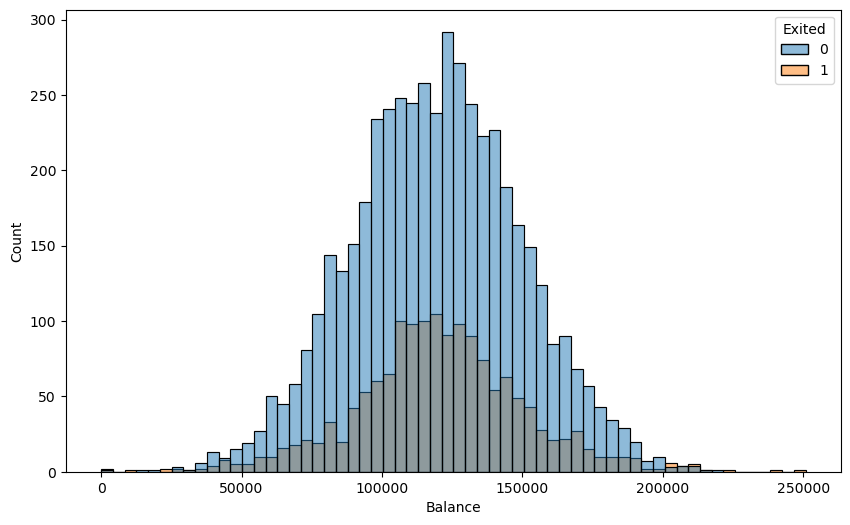

In [52]:
fig, ax = plt.subplots(figsize =(10, 6))
sns.histplot(data=Balance_df, x="Balance", hue="Exited")

In [34]:
df_Balance = pd.pivot_table(Balance_df,values = 'Balance', index = 'Exited', aggfunc = 'mean')
df_Balance.reset_index(drop = False, inplace = True)
df_Balance

,Exited,Balance
0,0,119514.470580
1,1,120650.495192


- Có thể thấy số dư tài khoản không liên quan đến tỷ lệ rời bỏ của khách hàng.

##  <h2> <b>  6. HasCrCard: <a class='anchor' id='chapter6'></a>

In [26]:
HasCrCard_df = pd.pivot_table(df,values = 'Exited', index = 'HasCrCard', aggfunc = 'mean')
HasCrCard_df.reset_index(drop = False, inplace = True)
HasCrCard_df

,HasCrCard,Exited
0,0,0.208149
1,1,0.201984


- Tỷ lệ khách hàng có thẻ tín dụng và không có thẻ tín dụng gần như là bằng nhau

##  <h2> <b>  7. CreditScore: <a class='anchor' id='chapter7'></a>

<Axes: xlabel='CreditScore', ylabel='Count'>

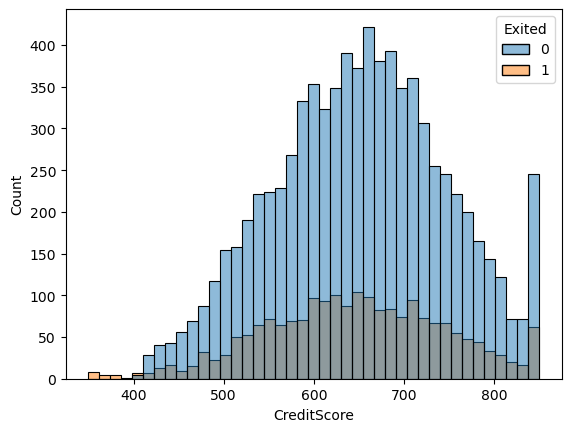

In [28]:
sns.histplot(data=df, x="CreditScore", hue="Exited")

In [13]:
CreditScore_df = df.groupby(by=['CreditScore','Exited']).agg('count')
CreditScore_df.reset_index(drop = False, inplace = True)
CreditScore_df = CreditScore_df[['Exited','CreditScore']]
CreditScore_df

,Exited,CreditScore
0,1,350
1,1,351
2,1,358
3,1,359
4,1,363
...,...,...
857,0,848
858,0,849
859,1,849
860,0,850


<Axes: xlabel='CreditScore', ylabel='Count'>

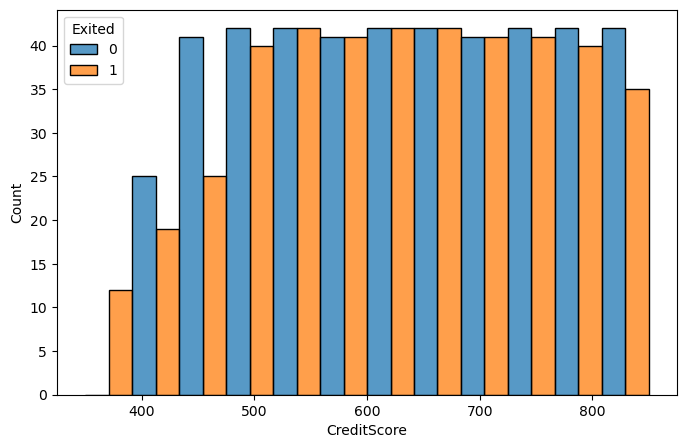

In [24]:
fig, ax = plt.subplots(figsize =(8,5))
sns.histplot(data=CreditScore_df, x="CreditScore", hue="Exited", multiple="dodge")

In [37]:
df_CreditScore = pd.pivot_table(CreditScore_df,values = 'CreditScore', index = 'Exited', aggfunc = 'mean')
df_CreditScore.reset_index(drop = False, inplace = True)
df_CreditScore

,Exited,CreditScore
0,0,629.457014
1,1,627.573810


- Có thể thấy số điểm tín dụng không liên quan đến tỷ lệ rời bỏ của khách hàng.

##  <h2> <b>  8. IsActiveMember: <a class='anchor' id='chapter8'></a>

<Axes: xlabel='IsActiveMember', ylabel='count'>

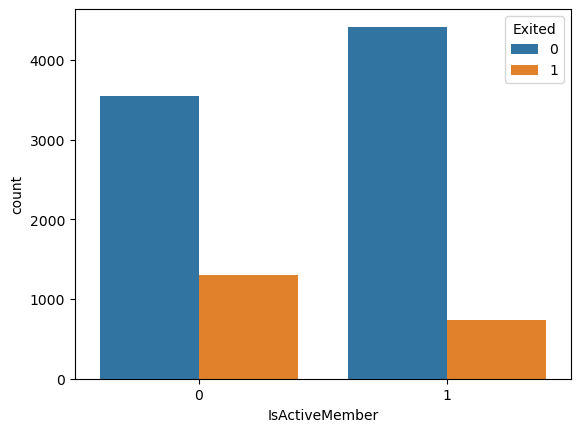

In [107]:
sns.countplot(data=df,x='IsActiveMember',hue='Exited')

<Axes: xlabel='IsActiveMember', ylabel='count'>

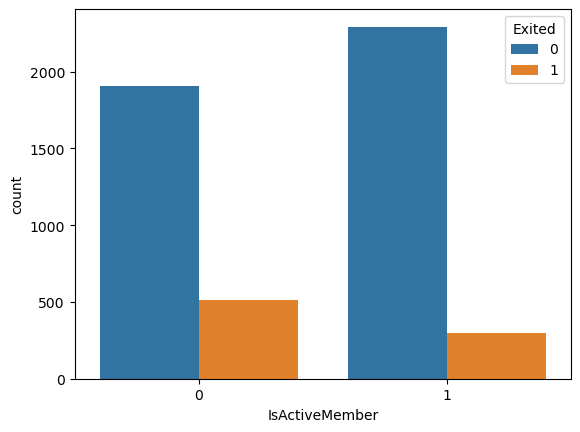

In [108]:
sns.countplot(data=df[df['Geography']=='France'],x='IsActiveMember',hue='Exited')

<Axes: xlabel='IsActiveMember', ylabel='count'>

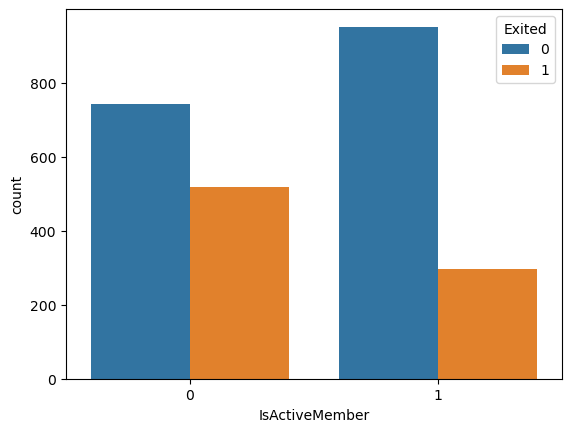

In [109]:
sns.countplot(data=df[df['Geography']=='Germany'],x='IsActiveMember',hue='Exited')

<Axes: xlabel='IsActiveMember', ylabel='count'>

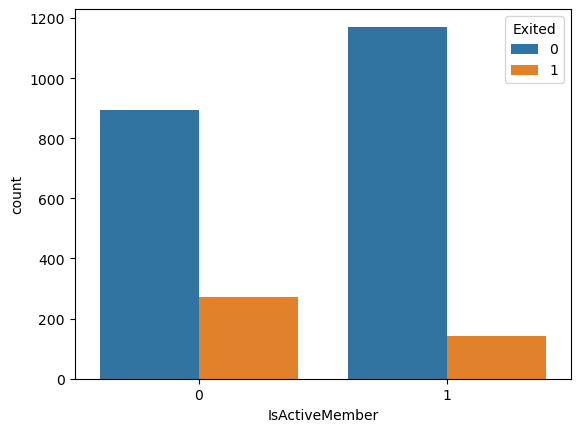

In [110]:
sns.countplot(data=df[df['Geography']=='Spain'],x='IsActiveMember',hue='Exited')

- Có thể thấy khách hàng tham gia tích cực thì thường ít có xu hướng rời bỏ dịch vụ hơn và ngược lại.

##  <h2> <b>  9. NumOfProducts: <a class='anchor' id='chapter9'></a>

In [128]:
NumOfProducts_df = df.groupby(by=['Exited','NumOfProducts']).agg('count')
NumOfProducts_df.reset_index(drop = False, inplace = True)
NumOfProducts_df = NumOfProducts_df[['Exited','NumOfProducts','CreditScore']]
NumOfProducts_df = NumOfProducts_df.rename(columns={'CreditScore':'Count'})
NumOfProducts_df

,Exited,NumOfProducts,Count
0,0,1,3675
1,0,2,4241
2,0,3,46
3,1,1,1409
4,1,2,349
5,1,3,220
6,1,4,60


<Axes: xlabel='NumOfProducts', ylabel='Count'>

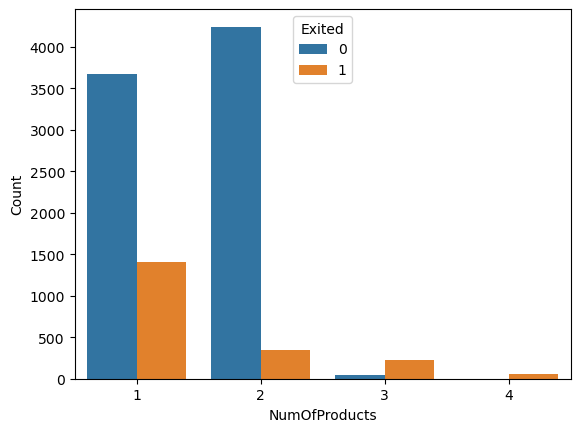

In [133]:
sns.barplot(data=NumOfProducts_df,x='NumOfProducts',y='Count',hue='Exited')

- Khách hàng không rời bỏ dịch vụ thường sử dụng dưới 3 sản phẩm, khách hàng rời bỏ dịch vụ có sử dụng tới sản phẩm thứ 4
- Sản phẩm 1 và 2 được khách hàng sử dụng nhiều nhất, nhưng tỉ lệ rời bỏ sau khi sử dụng 1 sản phẩm lại là cao nhất

##  <h2> <b>  10. Geography and Gender: <a class='anchor' id='chapter10'></a>

In [46]:
df_geo = df.groupby(by=['Geography','Exited','Gender']).agg('count')
df_geo.reset_index(drop = False, inplace = True)
df_geo = df_geo[['Geography','Exited','Gender','CreditScore']]
df_geo.rename(inplace=True,columns={'CreditScore':'Count'})
df_geo

,Geography,Exited,Gender,Count
0,France,0,Female,1801
1,France,0,Male,2402
2,France,1,Female,460
3,France,1,Male,351
4,Germany,0,Female,745
5,Germany,0,Male,950
6,Germany,1,Female,448
7,Germany,1,Male,366
8,Spain,0,Female,858
9,Spain,0,Male,1206


In [66]:
df_geo_ex = df_geo[df_geo['Exited']==1]
df_geo_ex['Geo_Gen'] = df_geo_ex['Geography'] + '-' + df_geo_ex['Gender']
df_geo_ex

/tmp/ipykernel_17494/117537666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo_ex['Geo_Gen'] = df_geo_ex['Geography'] + '-' + df_geo_ex['Gender']


,Geography,Exited,Gender,Count,Geo_Gen
2,France,1,Female,460,France-Female
3,France,1,Male,351,France-Male
6,Germany,1,Female,448,Germany-Female
7,Germany,1,Male,366,Germany-Male
10,Spain,1,Female,231,Spain-Female
11,Spain,1,Male,182,Spain-Male


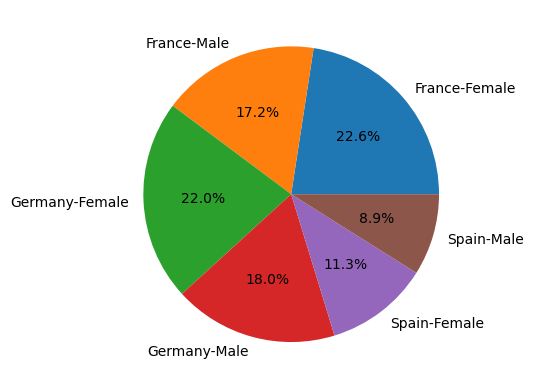

In [68]:
labels = df_geo_ex['Geo_Gen']
fig1, ax1 = plt.subplots()
ax1.pie(df_geo_ex['Count'],labels=labels, autopct = '%1.1f%%') 
plt.show()

- Nam giới có tỉ lệ rời bỏ thấp hơn so với Nữ , đặc biệt tỉ lệ rời bỏ của nữ tại Pháp/Đức cao hơn
- Dù số dười sử dụng tại Pháp gấp đôi so với Đưc, nhưng tỉ lệ số người rời bỏ gần như bằng nhau

In [71]:
df_geo_inex = df_geo[df_geo['Exited']==0]
df_geo_inex['Geo_Gen'] = df_geo_inex['Geography'] + '-' + df_geo_ex['Gender']
df_geo_inex

/tmp/ipykernel_17494/3166433409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo_inex['Geo_Gen'] = df_geo_inex['Geography'] + '-' + df_geo_ex['Gender']


,Geography,Exited,Gender,Count,Geo_Gen
0,France,0,Female,1801,France-Female
1,France,0,Male,2402,France-Male
4,Germany,0,Female,745,Germany-Female
5,Germany,0,Male,950,Germany-Male
8,Spain,0,Female,858,Spain-Female
9,Spain,0,Male,1206,Spain-Male


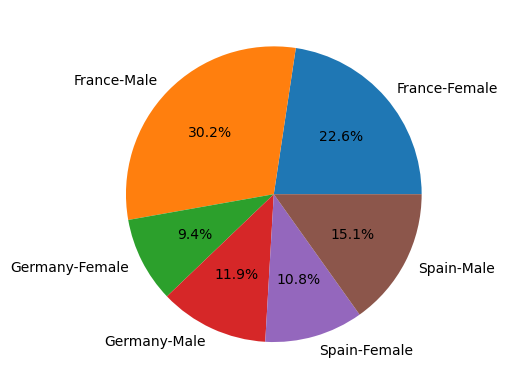

In [75]:
labels = df_geo_inex['Geo_Gen']
fig1, ax1 = plt.subplots()
ax1.pie(df_geo_inex['Count'],labels=labels, autopct = '%1.1f%%') 
plt.show()

- Tỉ lệ Nam giới tiếp tục sử dụng dịch vụ cao hơn Nữ giới
- Vì số người sử dụng dịch vụ ở Pháp cao hơn Đức/Tây Ban Nha nên có thể thấy tỉ lệ người không rời bỏ ở Pháp vẫn cao hơn so với 2 nước còn lại

##  <h2> <b>  11. Tenure and Gender: <a class='anchor' id='chapter11'></a>

In [78]:
df_ten = df.groupby(by=['Tenure','Exited','Gender']).agg('count')
df_ten.reset_index(drop = False, inplace = True)
df_ten = df_ten[['Tenure','Exited','Gender','CreditScore']]
df_ten.rename(inplace=True,columns={'CreditScore':'Count'})
df_ten

,Tenure,Exited,Gender,Count
0,0,0,Female,149
1,0,0,Male,169
2,0,1,Female,55
3,0,1,Male,40
4,1,0,Female,348
5,1,0,Male,455
6,1,1,Female,130
7,1,1,Male,102
8,2,0,Female,367
9,2,0,Male,480


<Axes: xlabel='Tenure', ylabel='Count'>

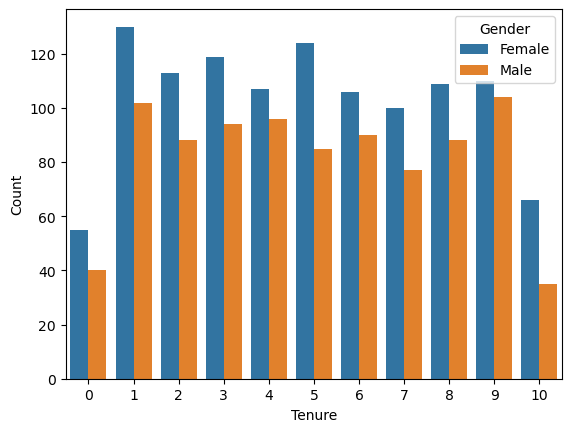

In [82]:
# Exited
sns.barplot(x=df_ten[df_ten['Exited']==1]['Tenure'],y=df_ten['Count'],hue=df_ten['Gender'])

<Axes: xlabel='Tenure', ylabel='Count'>

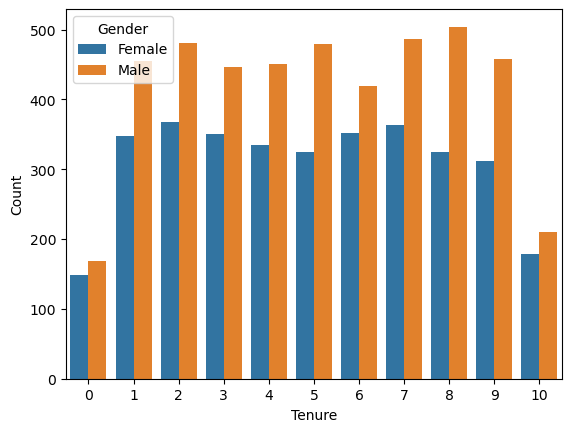

In [83]:
# Inexited
sns.barplot(x=df_ten[df_ten['Exited']==0]['Tenure'],y=df_ten['Count'],hue=df_ten['Gender'])


In [ ]:
- Từ biểu đồ có thể thấy tỉ lệ rời bỏ của nữ giới cao hơn nam giới

##  <h2> <b>  12. Number of products and Geography: <a class='anchor' id='chapter12'></a>

In [89]:
df_product = df.groupby(by=['Exited','NumOfProducts','Geography']).agg('count')
df_product.reset_index(drop = False, inplace = True)
df_product = df_product[['Exited','NumOfProducts','Geography','CreditScore']]
df_product.rename(inplace=True,columns={'CreditScore':'Count'})
df_product

,Exited,NumOfProducts,Geography,Count
0,0,1,France,1950
1,0,1,Germany,771
2,0,1,Spain,954
3,0,2,France,2231
4,0,2,Germany,914
5,0,2,Spain,1096
6,0,3,France,22
7,0,3,Germany,10
8,0,3,Spain,14
9,1,1,France,564


<Axes: xlabel='NumOfProducts', ylabel='Count'>

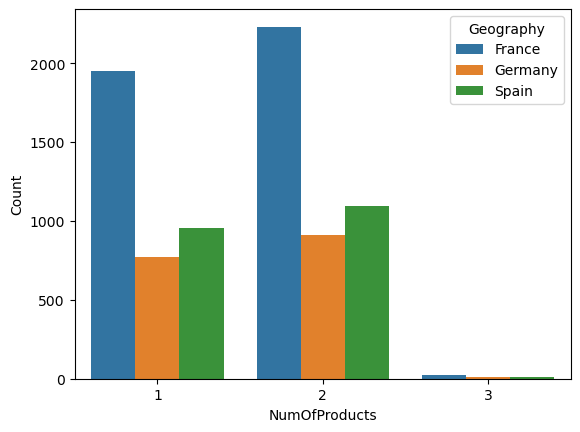

In [92]:
# Inexited
sns.barplot(data=df_product[df_product['Exited']==0], x = 'NumOfProducts', y = 'Count', hue='Geography')

- Sản phẩm 1,2 chiếm tỉ lệ sử dụng lớn nhất đặc biệt ở Pháp


<Axes: xlabel='NumOfProducts', ylabel='Count'>

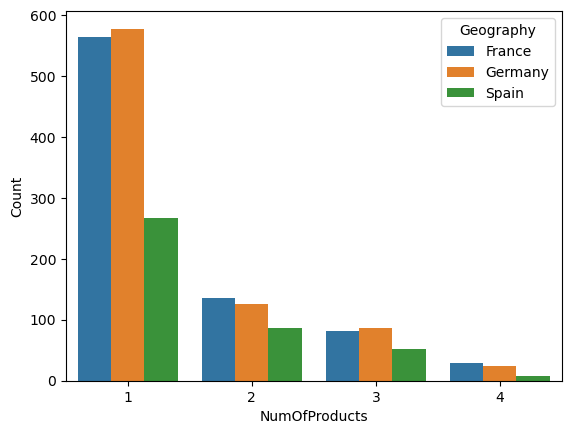

In [91]:
# Exited
sns.barplot(data=df_product[df_product['Exited']==1], x = 'NumOfProducts', y = 'Count', hue='Geography')

- Tỉ lệ người rời bỏ sau khi sử dụng 1 sản phẩm chiếm khá cao
- Người rời bỏ dịch vụ có sử dụng tới sản phẩm thứ tư
- Ngoài ra có thể thấy trên cả 3 quốc giá thì sản phẩm 1 và 2 chiếm đa số

##  <h2> <b>  13. Conclude: <a class='anchor' id='chapter13'></a>

- Từ các phân tích trên có thể thấy các yếu tố như Tuổi tác, Mức lương, Điểm tín dụng, Số dư tài khoản và ActiveMember không ảnh hưởng đến tỷ lệ rời bỏ của khách hàng.
- Trái lại có thể thấy giới tính và vị trí địa lý lại có ảnh hưởng đến tỷ lệ rời bỏ sử dụng dịch vụ. Đặc biệt là nữ giới ở Đức và Pháp đều chiếm trên 20% trên tổng số. Từ đây có thể khảo sát và đưa ra các sản phẩm phù hợp hơn cho nữ giới tại các nước này để cải thiện tỉ lệ rời bỏ sử dụng dịch vụ
- Ngoài ra tỉ lệ khách hàng rời bỏ sau khi sử dụng 1 sản phẩm chiểm tỷ lệ cao hơn, chúng ta có thể khảo sát lý do tại sao khách hàng lại rời bỏ ngay sau khi chỉ sử dụng 1 sản phẩm để có thể tìm ra phương án thay đổi hiệu quả hơn.